In [2]:
import pandas as pd
from plotnine import *

In [3]:
#Carregamento da base
df = pd.read_csv('BaseDados/microdados_matriculas_2021.csv', sep=';', low_memory=False)
df.shape

(1507476, 54)

In [6]:
df.head()

,Carga Horaria,Carga Horaria Minima,Categoria de Situação,Cod Unidade,Cor/Raça,Código da Matrícula,Código da Unidade de Ensino - SISTEC,Código do Ciclo de Matrícula,Código do Município com DV,Data de Fim Previsto do Ciclo,...,Vagas Ofertadas,Vagas Regulares AC,Vagas Regulares l1,Vagas Regulares l10,Vagas Regulares l13,Vagas Regulares l14,Vagas Regulares l2,Vagas Regulares l5,Vagas Regulares l6,Vagas Regulares l9
0,3182,800,Concluintes,17,BRANCA,66845709,13791,2016192,5201108,20/12/2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3641,1200,Concluintes,279,BRANCA,66801823,3508,2016354,5211503,20/12/2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5800,4000,Concluintes,523,BRANCA,64271041,2956,1859227,5221809,21/12/2018,...,40.0,20.0,3.0,1.0,1.0,1.0,5.0,3.0,5.0,1.0
3,4370,3600,Evadidos,523,BRANCA,44608044,2956,1206840,5221809,22/12/2016,...,40.0,20.0,3.0,1.0,1.0,1.0,5.0,3.0,5.0,1.0
4,5800,4000,Concluintes,523,BRANCA,59220389,2956,1859227,5221809,21/12/2018,...,40.0,20.0,3.0,1.0,1.0,1.0,5.0,3.0,5.0,1.0


In [9]:
#Fazendo uma extração do Dataset geral somente as colunas que nos dariam os dados que interessariam para o nosso estudo
studyColumns = ['Cor/Raça', 'Eixo Tecnológico', 'Faixa Etária', 'Fator Esforco Curso', 'Fonte de Financiamento', 'Idade', 'Instituição', 'Modalidade de Ensino', 'Código do Município com DV', 'Nome de Curso', 'Região', 'Renda Familiar', 'Sexo', 'Situação de Matrícula', 'Tipo de Curso', 'Turno', 'UF', 'Unidade de Ensino']
df = df[studyColumns]
df.shape

(1507476, 18)

In [14]:
# 2.1. Verificando dados em falta
print(df.isnull().sum())

Cor/Raça                         0
Eixo Tecnológico                 0
Faixa Etária                     0
Fator Esforco Curso              0
Fonte de Financiamento           0
Idade                         3784
Instituição                      0
Modalidade de Ensino             0
Código do Município com DV       0
Nome de Curso                    0
Região                           0
Renda Familiar                   0
Sexo                             0
Situação de Matrícula            0
Tipo de Curso                    0
Turno                            0
UF                               0
Unidade de Ensino                0
dtype: int64


In [15]:
# 2.2. Removendo linhas com dados em falta
df_cleaned = df.dropna()
df_cleaned.shape

(1503692, 18)

In [16]:
# 2.3. Converter tipo de dado
df_cleaned['Idade'] = df_cleaned['Idade'].astype(int)

C:\Users\junio\AppData\Local\Temp\ipykernel_22456\526748933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
#Verificando os dados

#Idade
print(df_cleaned['Renda Familiar'].unique())

['1<RFP<=1,5' 'RFP>3,5' '0<RFP<=0,5' '1,5<RFP<=2,5' '2,5<RFP<=3,5'
 'Não declarada' '0,5<RFP<=1']


In [18]:
#Situação de Matrícula
situacoes_matricula = df_cleaned['Situação de Matrícula'].unique()
situacoes_matricula

array(['Integralizada', 'Concluída', 'Abandono', 'Em curso', 'Desligada',
       'Cancelada', 'Transf. externa', 'Transf. interna', 'Reprovado'],
      dtype=object)

In [23]:
#Tipo de Curso
tipos_cursos = df_cleaned['Tipo de Curso'].unique()
tipos_cursos

array(['Técnico', 'Bacharelado', 'Tecnologia',
       'Qualificação Profissional (FIC)', 'Especialização (Lato Sensu)',
       'Mestrado Profissional', 'Mestrado', 'Ensino Fundamental II',
       'Ensino Médio', 'Licenciatura', 'Ensino Fundamental I',
       'Doutorado', 'Educação Infantil'], dtype=object)

## filtros

In [41]:
df_filtered = df_cleaned[ (df_cleaned['Instituição'] == "IFSP") & (df_cleaned['Tipo de Curso'].isin(['Técnico', 'Bacharelado', 'Tecnologia', 'Ensino Médio', 'Licenciatura'])) ]
df_filtered.shape

(43620, 18)

,Cor/Raça,Eixo Tecnológico,Faixa Etária,Fator Esforco Curso,Fonte de Financiamento,Idade,Instituição,Modalidade de Ensino,Código do Município com DV,Nome de Curso,Região,Renda Familiar,Sexo,Situação de Matrícula,Tipo de Curso,Turno,UF,Unidade de Ensino
687,BRANCA,Informação e Comunicação,20 a 24 anos,"1,25",Sem Programa Associado,20,IFSP,Educação Presencial,3507605,Técnico em Informática,Região Sudeste,Não declarada,F,Desligada,Técnico,Integral,SP,Campus Bragança Paulista
712,NÃO DECLARADA,Informação e Comunicação,20 a 24 anos,"1,25",Sem Programa Associado,21,IFSP,Educação Presencial,3507605,Técnico em Informática,Região Sudeste,Não declarada,F,Desligada,Técnico,Integral,SP,Campus Bragança Paulista
724,NÃO DECLARADA,Controle e Processos Industriais,25 a 29 anos,"1,19",Sem Programa Associado,27,IFSP,Educação Presencial,3550308,Engenharia de Controle e Automação,Região Sudeste,Não declarada,F,Em curso,Bacharelado,Integral,SP,Campus São Paulo
736,PARDA,Informação e Comunicação,20 a 24 anos,"1,25",Sem Programa Associado,20,IFSP,Educação Presencial,3550308,Técnico em Informática,Região Sudeste,"1<RFP<=1,5",F,Concluída,Técnico,Integral,SP,Campus São Paulo
741,PARDA,Controle e Processos Industriais,25 a 29 anos,"1,16",Sem Programa Associado,25,IFSP,Educação Presencial,3550308,Engenharia Eletrônica,Região Sudeste,"0<RFP<=0,5",F,Concluída,Bacharelado,Integral,SP,Campus São Paulo


In [38]:
df_filtered = df_filtered[ df_filtered['Situação de Matrícula'].isin(["Abandono", "Desligada", "Cancelada"]) ]
df_filtered.shape

(2622, 18)

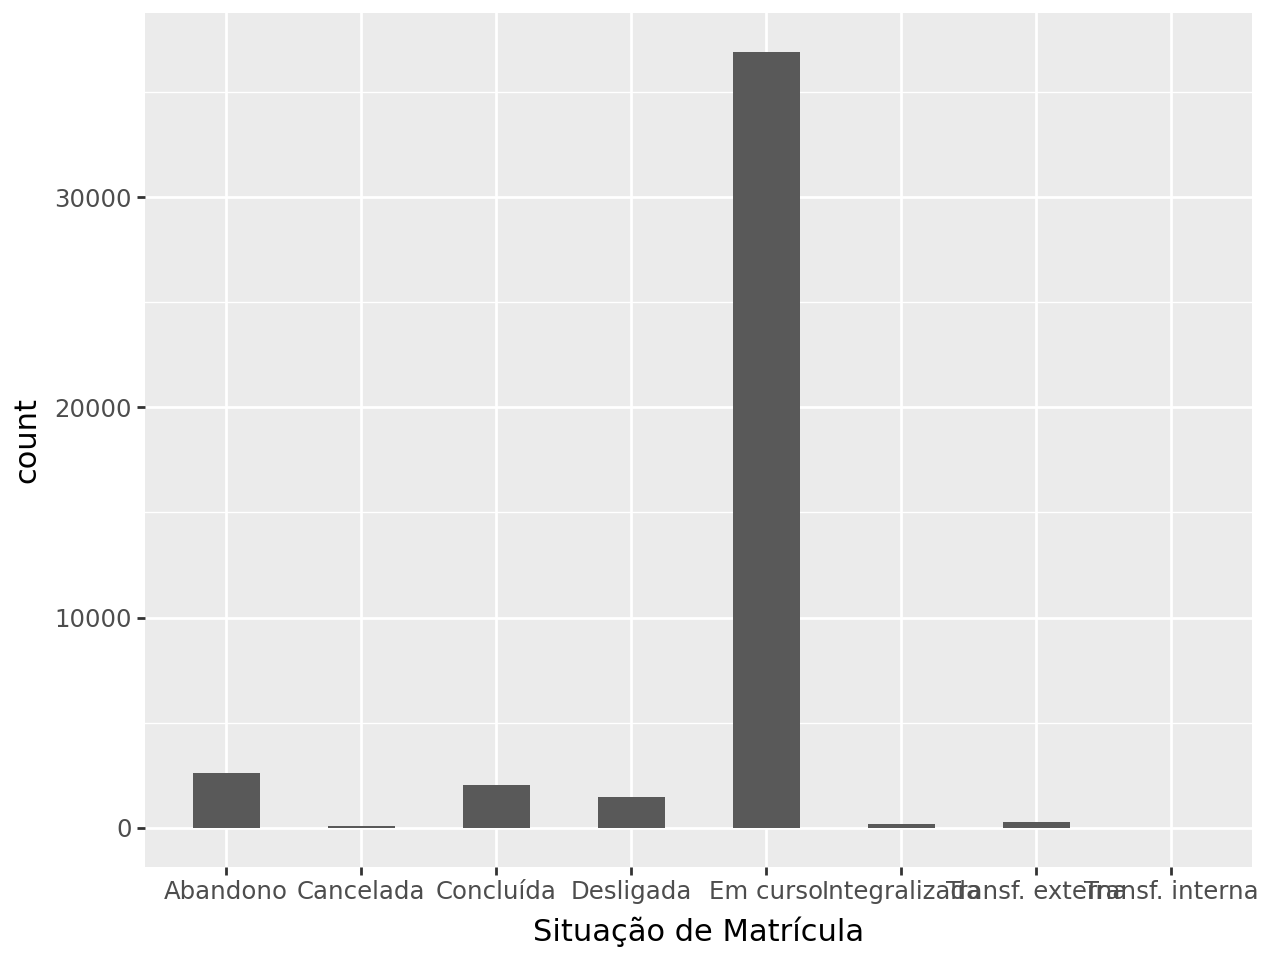

In [42]:
(
    ggplot(df_filtered, aes(x="Situação de Matrícula"))
    + geom_histogram(binwidth=0.50)
)